# Invasive Ductal Cancer

In [45]:
# from google.colab import drive
# drive.mount('/content/drive')

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image as Image

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Running locally
X = np.load('../idc/data/X.npy')
y = np.load('../idc/data/Y.npy')

In [6]:
# # Running in Colab
# X = np.load('/content/drive/MyDrive/Colab Notebooks/data/X.npy')
# y = np.load('/content/drive/MyDrive/Colab Notebooks/data/Y.npy')

In [3]:
X.shape

(5547, 50, 50, 3)

In [50]:
y.shape

(5547,)

In [51]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
neg = X[y==0]
pos = X[y==1]

In [34]:
neg

array([[[[226, 164, 206],
         [224, 154, 196],
         [225, 175, 211],
         ...,
         [240, 221, 237],
         [232, 184, 214],
         [243, 213, 235]],

        [[217, 142, 188],
         [221, 130, 179],
         [224, 150, 196],
         ...,
         [227, 170, 204],
         [229, 180, 215],
         [236, 212, 232]],

        [[237, 178, 212],
         [229, 157, 199],
         [218, 125, 175],
         ...,
         [221, 184, 217],
         [190, 153, 193],
         [227, 164, 208]],

        ...,

        [[217, 145, 192],
         [214, 129, 184],
         [212, 129, 183],
         ...,
         [194, 122, 185],
         [204, 143, 193],
         [189, 129, 188]],

        [[218, 144, 192],
         [213, 128, 185],
         [208, 121, 171],
         ...,
         [136,  79, 145],
         [184, 111, 174],
         [188, 112, 176]],

        [[212, 125, 181],
         [211, 136, 181],
         [220, 162, 206],
         ...,
         [127,  90, 152],
        

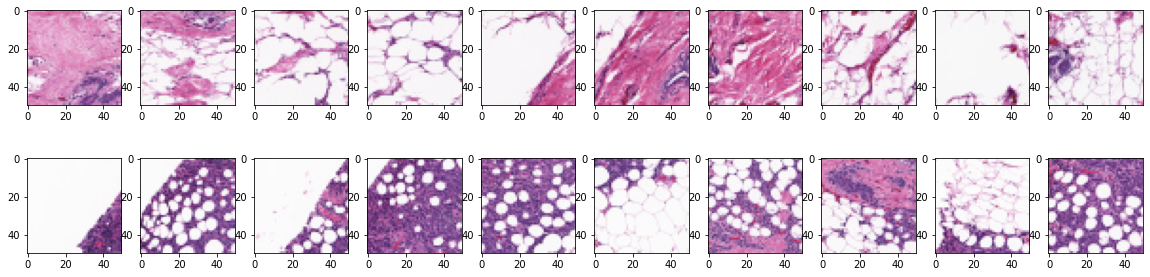

In [6]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])


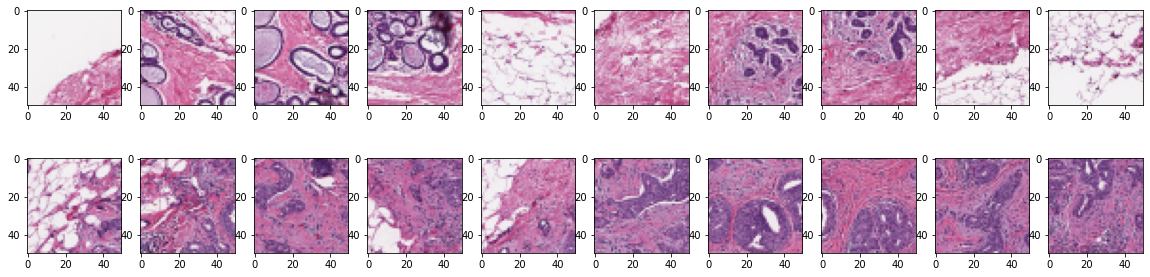

In [7]:
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(neg[i+80])
    plt.subplot(2,n,n+i+1)
    plt.imshow(pos[i+80])

## Baseline CNN Model

In [8]:
X_scaled = X/255

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

2021-11-22 17:28:47.557539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 17:28:47.557857: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [11]:
# Complete model
model = models.Sequential()
model.add(layers.Conv2D(16, kernel_size=(2,2), input_shape=(50, 50, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 16)        208       
_________________________________________________________________
flatten (Flatten)            (None, 38416)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 38417     
Total params: 38,625
Trainable params: 38,625
Non-trainable params: 0
_________________________________________________________________


2021-11-22 17:28:50.972508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 17:28:50.972637: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 17:28:50.972776: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-NEEV1SD): /proc/driver/nvidia/version does not exist
2021-11-22 17:28:50.975002: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=10,  # Use early stop in practice
          batch_size=32, 
          verbose=1)

2021-11-22 17:28:51.379177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 17:28:51.391632: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2112005000 Hz


Epoch 1/10
130/130 [==============================] - 3s 14ms/step - loss: 0.6726 - accuracy: 0.6291
Epoch 2/10
130/130 [==============================] - 2s 12ms/step - loss: 0.5437 - accuracy: 0.7442
Epoch 3/10
130/130 [==============================] - 2s 12ms/step - loss: 0.5210 - accuracy: 0.7584
Epoch 4/10
130/130 [==============================] - 2s 13ms/step - loss: 0.4945 - accuracy: 0.7733
Epoch 5/10
130/130 [==============================] - 2s 13ms/step - loss: 0.4785 - accuracy: 0.7791
Epoch 6/10
130/130 [==============================] - 2s 13ms/step - loss: 0.4418 - accuracy: 0.8096
Epoch 7/10
130/130 [==============================] - 2s 14ms/step - loss: 0.4141 - accuracy: 0.8209
Epoch 8/10
130/130 [==============================] - 2s 12ms/step - loss: 0.4057 - accuracy: 0.8315
Epoch 9/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3798 - accuracy: 0.8425
Epoch 10/10
130/130 [==============================] - 2s 12ms/step - loss: 0.3662 - accura

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([[0.23362586],
       [0.43169075],
       [0.48832747],
       ...,
       [0.8168049 ],
       [0.08816761],
       [0.9484371 ]], dtype=float32)

In [15]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 7ms/step - loss: 0.5760 - accuracy: 0.7296


[0.5760154128074646, 0.7296323180198669]

Precision Recall Curve

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

data = pd.DataFrame()

In [17]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.50036364 0.5        0.49963583 0.5        0.5003647 ]
recall- [1.         0.99854651 0.99709302 0.99709302 0.99709302]
threshold- [0.01842991 0.01959509 0.02089629 0.02138206 0.02209437]


In [18]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]})
scores.head()

,threshold,precision,recall
0,0.018430,0.500364,1.000000
1,0.019595,0.500000,0.998547
2,0.020896,0.499636,0.997093
3,0.021382,0.500000,0.997093
4,0.022094,0.500365,0.997093


Text(0.5, 0, 'recall')

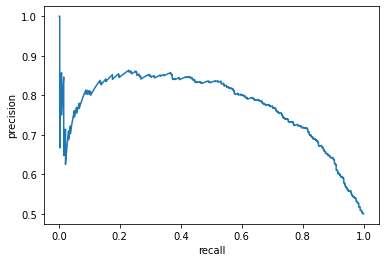

In [19]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [20]:
# Find threshold that guarantees 0.8 recall score
threshold = scores[scores['recall'] >= 0.8].threshold.max()
threshold

0.2875526

In [21]:
from sklearn.metrics import recall_score, precision_score, f1_score

def custom_predict(X, custom_threshold):
    probs = model.predict(X)
    return (probs > custom_threshold).astype(int) # Boolean outcome converted to 0 or 1
    
updated_preds = custom_predict(X=X_train, custom_threshold=threshold) # Update predictions 

print(recall_score(y_train, updated_preds)) # Rerun recall
print(precision_score(y_train, updated_preds)) # Rerun precision
print(f1_score(y_train, updated_preds)) # Rerun f1

0.9071428571428571
0.8512064343163539
0.8782849239280774


Save and load model

In [22]:
from keras.models import load_model

model.save('model.h5')

In [23]:
model2 = load_model('model.h5')

In [24]:
model2.predict(X_test)

array([[0.23362586],
       [0.43169075],
       [0.48832747],
       ...,
       [0.8168049 ],
       [0.08816761],
       [0.9484371 ]], dtype=float32)

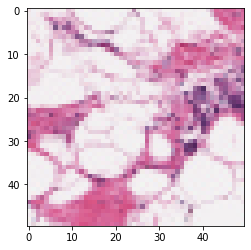

In [80]:
plt.imshow(X[22])
plt.savefig('test.png')

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 16)        208       
_________________________________________________________________
flatten (Flatten)            (None, 38416)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 38417     
Total params: 38,625
Trainable params: 38,625
Non-trainable params: 0
_________________________________________________________________


In [149]:
model_builder = keras.applications.xception.Xception
img_size = (50, 50)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d"

# The local path to our target image
# img_path = keras.utils.get_file("Test_image.jpg", test.png))
# img_path = Image.open('test.png')
# img_path = test.png
# display(Image(img_path))


# The local path to our target image
img_path = keras.utils.load_img('test.png')
# img_path = keras.utils.get_file('test.png', 'test.png')

display(Image(img_path))

AttributeError: module 'tensorflow.keras.utils' has no attribute 'load_img'

In [150]:
from PIL import Image

#read the image
img_path = Image.open('test.png')




In [161]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [152]:
model

In [153]:
img_array = get_img_array('test.png', (50,50))
img_array.shape

(1, 50, 50, 3)

In [154]:
# make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions

pred_index=None
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
)
grad_model

In [155]:
# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(img_array)
    if pred_index is None:
        pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]


In [156]:
# This is the gradient of the output neuron (top predicted or chosen)
# with regard to the output feature map of the last conv layer
grads = tape.gradient(class_channel, last_conv_layer_output)
grads

<tf.Tensor: shape=(1, 49, 49, 16), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 

In [160]:
# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
pooled_grads

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [162]:
make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [163]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

TypeError: expected str, bytes or os.PathLike object, not PngImageFile

In [76]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

NameError: name 'heatmap' is not defined

In [54]:
# Dummy image
img = X[100]
pred_raw = model.predict(np.expand_dims(img, axis=0))[0][0]
pred_raw

0.0

In [ ]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)

save_and_display_gradcam(img_path, heatmap)